# VIIRS Extraction

In [1]:
# imports
from importlib import reload

import numpy as np
import xarray
import h5py 

from matplotlib import pyplot as plt

from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting

# Example file

In [2]:
#dfile = '/home/xavier/Projects/Oceanography/data/SST/VIIRS/20130410235000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
dfile = '/home/xavier/Oceanography/data/SST/VIIRS/20160102003000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [3]:
ds = xarray.open_dataset(dfile)

In [18]:
ds.quality_level.data.astype(int)

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [5, 5, 5, ..., 1, 1, 1],
        [1, 1, 5, ..., 1, 1, 1],
        [1, 1, 5, ..., 1, 1, 1]]])

In [20]:
np.unique(ds.quality_level.data.astype(int))

array([1, 5])

In [27]:
ds.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 1, nj: 5408, ni: 3200)>
[17305600 values with dtype=float32]
Coordinates:
  * time     (time) object 2016-01-02 00:30:00
    lat      (nj, ni) float32 ...
    lon      (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Attributes:
    comment:        SST obtained by regression with buoy measurements, sensit...
    long_name:      sea_surface_subskin_temperature
    source:         NOAA
    standard_name:  sea_surface_subskin_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [24]:
ds.quality_level

<xarray.DataArray 'quality_level' (time: 1, nj: 5408, ni: 3200)>
[17305600 values with dtype=float32]
Coordinates:
  * time     (time) object 2016-01-02 00:30:00
    lat      (nj, ni) float32 ...
    lon      (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Attributes:
    comment:        SST quality levels: 5 corresponds to clear-sky pixels and...
    flag_meanings:  missing invalid not_used not_used not_used clear
    flag_values:    [0 1 2 3 4 5]
    long_name:      quality level of SST pixel
    valid_max:      5
    valid_min:      0

In [22]:
sst = ds.sea_surface_temperature.data[0,...]

In [23]:
sst

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [297.71   , 298.65   , 298.63998, ...,       nan,       nan,
              nan],
       [297.63   , 298.68   , 298.65   , ...,       nan,       nan,
              nan],
       [293.53998, 298.38998, 298.9    , ...,       nan,       nan,
              nan]], dtype=float32)

In [28]:
sst.shape

(5392, 3200)

In [31]:
lat = ds.lat.data

In [33]:
lat.shape

(5392, 3200)

In [36]:
ds.close()

## Load routine

In [28]:
reload(viirs_io)
dfile2 = 's3://viirs/data/2013/001/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
sst, qual, latitude, longitude = viirs_io.load_nc(dfile2)#, verbose=False)

In [29]:
qual

array([[-32256, -32256, -32256, ..., -32256, -32256, -32256],
       [-32256, -32256, -32256, ..., -32256, -32256, -32256],
       [-32256, -32256, -32256, ..., -32256, -32256, -32256],
       ...,
       [   512,    512,  16896, ...,    512,    512,    512],
       [   512,    512, -32256, ...,    512,    512,    512],
       [   512,    512,    512, ...,    512,    512,    512]], dtype=int16)

## Bad file?

In [9]:
bad_file = 's3://viirs/data/2013/359/20131225230000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
sst, qual, latitude, longitude = viirs_io.load_nc(bad_file)#, verbose=False)

# List of files

In [9]:
all_files = ulmo_io.list_of_bucket_files('viirs')

In [10]:
all_files[0:10]

['data/2013/001/20130101000000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101002000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101003000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101004000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101005000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101010000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101011000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101012000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 'data/2013/001/20130101013000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc']

## 2013

In [15]:
bucket = 's3://viirs/'
files = []
for ifile in all_files:
    if 'data/2013' in ifile:
        files.append(bucket+ifile)

In [16]:
files[0:5]

['s3://viirs/data/2013/001/20130101000000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 's3://viirs/data/2013/001/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 's3://viirs/data/2013/001/20130101002000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 's3://viirs/data/2013/001/20130101003000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 's3://viirs/data/2013/001/20130101004000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc']

# Test extraction

In [63]:
reload(viirs_io)
reload(viirs_extract)

<module 'ulmo.viirs.extract' from '/tank/xavier/Oceanography/Python/ulmo/ulmo/viirs/extract.py'>

In [64]:
#load_path = '/home/xavier/Projects/Oceanography/data/SST/VIIRS'
#filename = '/home/xavier/Projects/Oceanography/data/SST/VIIRS/20160102000000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
#filename = 's3://viirs/data/2013/001/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
filename = '/home/xavier/Projects/Oceanography/data/SST/VIIRS/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
result = viirs_extract.extract_file(filename)

In [22]:
result[2][0]

array(['/home/xavier/Projects/Oceanography/data/SST/VIIRS/20130101001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
       '1020', '2592', '-55.172756', '-165.49512', '0.04882812500000211'],
      dtype='<U129')

In [23]:
len(result[2])

31

## Let's view it

In [9]:
sst, qual, latitude, longitude = viirs_io.load_nc(filename)#, verbose=False)

In [18]:
qual[32:200, 2112:2300]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
gd_data = qual == 5

In [20]:
np.sum(gd_data)

14582354

In [9]:
sst.shape

(5392, 3200)

In [10]:
mask_sst = sst.copy()
mask_sst[~gd_data] = np.nan

In [ ]:
np.sum(gd_data[432:432+192, ])

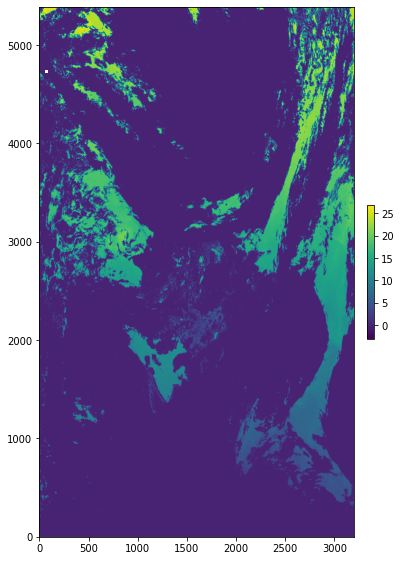

In [25]:
i, j = 1020, 2592
fig = plt.figure(figsize=(6,12))
img = plt.imshow(sst*gd_data, origin='lower', vmin=-3)
#img = plt.imshow((sst*gd_data)[i:i+192, j:j+192], origin='lower', vmin=-3)
cb = plt.colorbar(img, fraction=0.020, pad=0.04)
plt.show()

In [24]:
sst

array([[        nan,         nan,         nan, ...,  -2.5400085,
         -2.119995 ,  -2.2000122],
       [        nan,         nan,         nan, ...,  -2.9899902,
         -2.0400085,  -2.1600037],
       [        nan,         nan,         nan, ...,  -2.7799988,
         -2.0100098,  -2.1700134],
       ...,
       [-44.23999  , -46.929993 , -53.97     , ..., -31.449997 ,
                nan,         nan],
       [-44.229996 , -46.940002 , -54.020004 , ...,         nan,
                nan,         nan],
       [-48.20999  , -44.550003 , -48.11     , ...,         nan,
                nan,         nan]], dtype=float32)

## Bad?

In [11]:
result = viirs_extract.extract_file(bad_file)

## Not so satisfying! :) 

----

# Checking some extracted regions

In [4]:
ex_file = 's3://viirs/Extractions/VIIRS_2013_95clear_192x192_inpaint.h5'

In [5]:
with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [6]:
ex_hf.keys()

<KeysViewHDF5 ['fields', 'inpainted_masks', 'metadata']>

In [7]:
ex_hf['fields'].shape

(289, 192, 192)

In [8]:
ex_hf['inpainted_masks'].shape

(289, 192, 192)

In [9]:
pal, cm = plotting.load_palette()

In [10]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

## Plot a few

In [11]:
img0 = ex_hf['fields'][0,...]

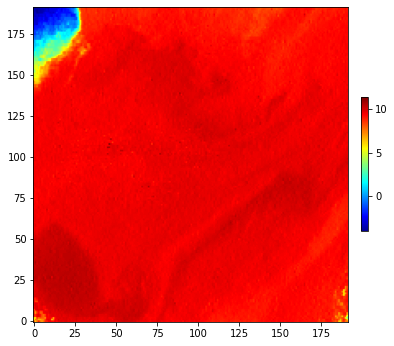

In [12]:
plt_ex(img0)

In [13]:
ex_hf['metadata'][0,...]

array([b's3://viirs/data/2013/347/20131213115000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
       b'4462', b'2739', b'-51.97334', b'-152.67638',
       b'0.04996744791666516'], dtype='|S104')

### Inpainted mask

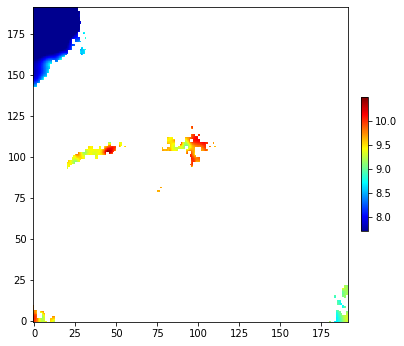

In [14]:
inp0 = ex_hf['inpainted_masks'][0,...]
plt_ex(inp0)

### Together

In [16]:
gdinp = np.isfinite(inp0)
#
comb0 = img0.copy()
comb0[gdinp] = inp0[gdinp]

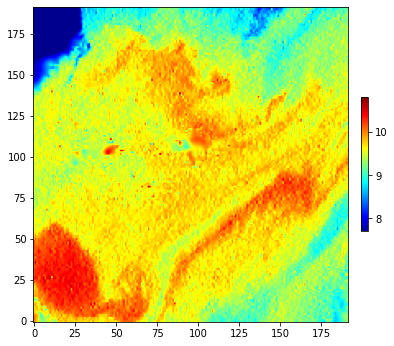

In [17]:
plt_ex(comb0)

In [48]:
raw_file = 's3://viirs/data/2013/347/20131213115000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
with ulmo_io.open(raw_file, 'rb') as f:
    ds_raw = xarray.open_dataset(f)

In [49]:
ds_raw

<xarray.Dataset>
Dimensions:                       (ni: 3200, nj: 5392, time: 1)
Coordinates:
  * time                          (time) object 2013-12-13 11:50:00
    lat                           (nj, ni) float32 ...
    lon                           (nj, ni) float32 ...
Dimensions without coordinates: ni, nj
Data variables:
    sst_dtime                     (time, nj, ni) timedelta64[ns] ...
    dt_analysis                   (time, nj, ni) float32 ...
    satellite_zenith_angle        (time, nj, ni) float32 ...
    sea_surface_temperature       (time, nj, ni) float32 ...
    sses_bias                     (time, nj, ni) float32 ...
    sses_standard_deviation       (time, nj, ni) float32 ...
    sea_ice_fraction              (time, nj, ni) float32 ...
    l2p_flags                     (time, nj, ni) int16 ...
    quality_level                 (time, nj, ni) float32 ...
    wind_speed                    (time, nj, ni) float32 ...
    brightness_temperature_11um   (time, nj, ni) float32 ...
    brightness_temperature_12um   (time, nj, ni) float32 ...
    brightness_temperature_4um    (time, nj, ni) float32 ...
    brightness_temperature_08um6  (time, nj, ni) float32 ...
Attributes:
    geospatial_bounds:                        POLYGON(( 167.185 -49.926, -173...
    geospatial_first_scanline_first_fov_lat:  [-18.288216]
    geospatial_first_scanline_first_fov_lon:  [-173.61325]
    geospatial_first_scanline_last_fov_lat:   [-22.830315]
    geospatial_first_scanline_last_fov_lon:   [-144.33229]
    geospatial_last_scanline_first_fov_lat:   [-49.925823]
    geospatial_last_scanline_first_fov_lon:   [167.18527]
    geospatial_last_scanline_last_fov_lat:    [-57.160748]
    geospatial_last_scanline_last_fov_lon:    [-145.70467]
    Conventions:                              CF-1.6, ACDD-1.3
    Metadata_Conventions:                     Unidata Dataset Discovery v1.0
    acknowledgement:                          Please acknowledge the use of t...
    cdm_data_type:                            swath
    comment:                                  none
    creator_email:                            Alex.Ignatov@noaa.gov
    creator_name:                             Alex Ignatov
    creator_url:                              http://www.star.nesdis.noaa.gov
    date_created:                             20190716T194441Z
    destripe:                                 yes (M5:1.0:f M7:1.0:f M10:1.0:...
    easternmost_longitude:                    [-144.33229]
    file_quality_level:                       [3]
    gds_version_id:                           02.0
    geospatial_lat_resolution:                [0.0067]
    geospatial_lat_units:                     degrees_north
    geospatial_lon_resolution:                [0.0067]
    geospatial_lon_units:                     degrees_east
    history:                                  Created by Advanced Clear-Sky P...
    id:                                       VIIRS_NPP-STAR-L2P-v2.61
    institution:                              NOAA/NESDIS/STAR
    keywords:                                 Oceans > Ocean Temperature > Se...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    license:                                  GHRSST protocol describes data ...
    metadata_link:                            http://podaac.jpl.nasa.gov/ws/m...
    naming_authority:                         org.ghrsst
    northernmost_latitude:                    [-18.288216]
    platform:                                 NPP
    processing_level:                         L2P
    product_version:                          2.61
    project:                                  Group for High Resolution Sea S...
    publisher_email:                          ghrsst-po@nceo.ac.uk
    publisher_name:                           The GHRSST Project Office
    publisher_url:                            http://www.ghrsst.org
    references:                               Data convention: GHRSST Data Sp...
    sensor: 

In [53]:
raw_cut = ds_raw.sea_surface_temperature.data[0,4462:4462+192, 2739:2739+192] - 273.15
raw_qual = ds_raw.quality_level.data[0,4462:4462+192, 2739:2739+192].astype(int)

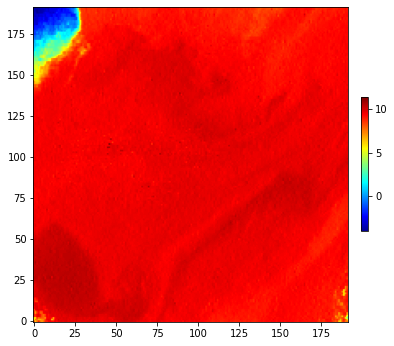

In [52]:
plt_ex(raw_cut)

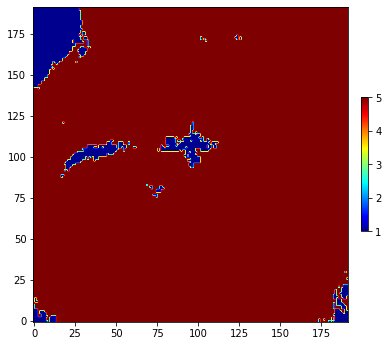

In [54]:
plt_ex(raw_qual)

### 100

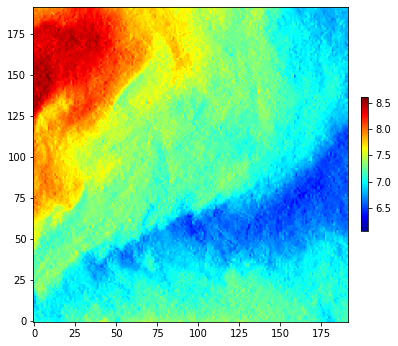

In [41]:
img100 = ex_hf['fields'][100,...]
plt_ex(img100)

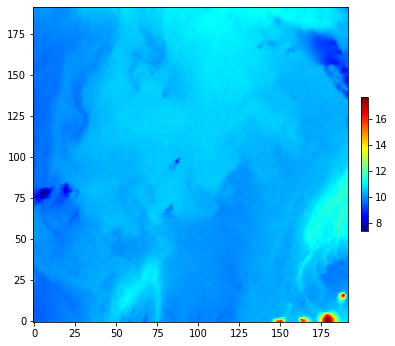

In [42]:
img500 = ex_hf['fields'][500,...]
plt_ex(img500)

---- 

# View a few PreProc images

In [55]:
pp_file = 's3://viirs/PreProc/VIIRS_2013_95clear_192x192_preproc_viirs_std.h5'
with ulmo_io.open(pp_file, 'rb') as f:
    pp_hf = h5py.File(f, 'r')

In [56]:
pp_hf.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [57]:
pp_hf['valid'].shape

(915, 1, 64, 64)

## Show a few

In [58]:
pp0 = pp_hf['valid'][0,0,...]

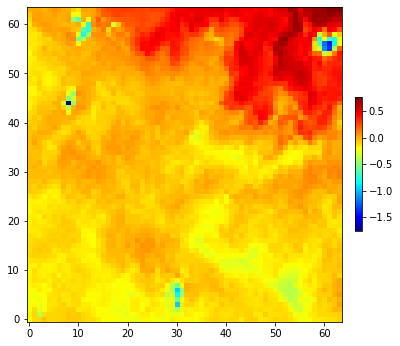

In [59]:
plt_ex(pp0)

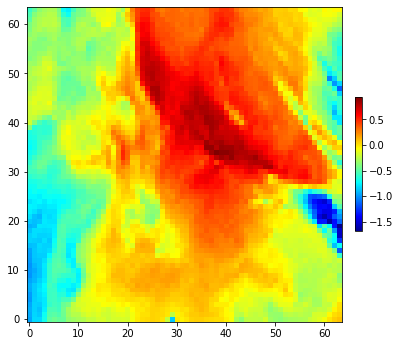

In [60]:
pp100 = pp_hf['valid'][100,0,...]
plt_ex(pp100)